# **Wealth vs Wellness**
## Quantifying the impact of Social Infrastructure on National Happiness Scores.

In [2]:
# Importing the libraries to be used in this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [10]:
# Loading data
df = pd.read_csv("2015.csv")

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Checking for missing values

In [7]:
df.isnull().sum()

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Renaming columns to simplify coding process

In [12]:
df.columns = [
    'country',
    'region',
    'happiness_rank',
    'happiness_score',
    'standard_error',
    'gdp_per_capita',
    'family',
    'life_expectancy',
    'freedom',
    'trust',
    'generosity',
    'dystopia_residual'
]

In [13]:
df.head()

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,family,life_expectancy,freedom,trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Correlation Heatmap

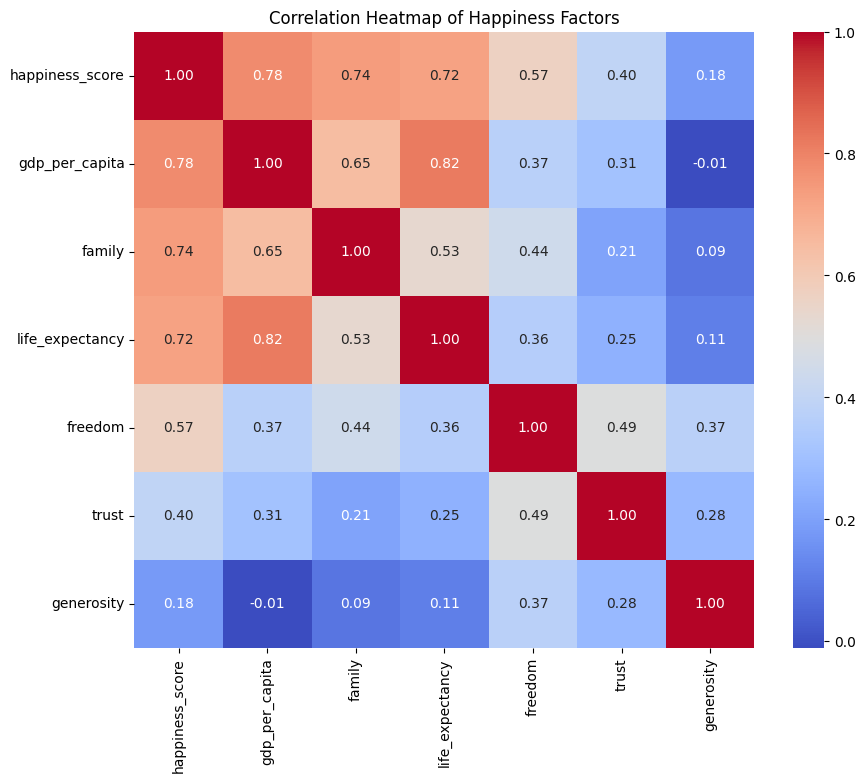

<Figure size 640x480 with 0 Axes>

In [32]:
# Correlation Matrix
plt.figure(figsize=(10,8))
correlation_matrix = df[['happiness_score', 'gdp_per_capita', 'family','life_expectancy', 'freedom', 'trust', 'generosity']].corr()

# Visualize with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap of Happiness Factors')
plt.show()
plt.savefig('correlation_heatmap.png')

## **Findings**
Based on the correlation coefficients, we can rank the factors by their impact on the happiness_score:
1. GDP per capita (0.78), Family (0.74) and Life Expectancy (0.72) are the dominant drivers. These show a strong positive correletion meaning happiness always follows when they rise.

2. Our engineered interest in Family(social support proxy) is nearly important as money.  0.74 correlation is statistically very significant.

3. Generosity (0.18) and Trust (0.40) have low correlations with the overall score. This suggests that while being generous or trusting is good, they are not the primary predictors of a country's happiness rank compared to basic needs and social structure.


## **Insights**
  There is a high correlation between GDP per capita and Life Expectancy (0.82). Therefore, GDP does not just buy things but it buys healthcare and nutrition that lead to longer happier lives.






In [22]:
# Mean and Standard Deviation calculation
mean_happiness = df['happiness_score'].mean()
std_happiness = df['happiness_score'].std()

top_threshold = np.percentile(df['happiness_score'], 75)

df['status'] = np.where(df['happiness_score'] >= top_threshold, 'Top Tier', 'Developing/Stable')



Plotting Social Strength Index

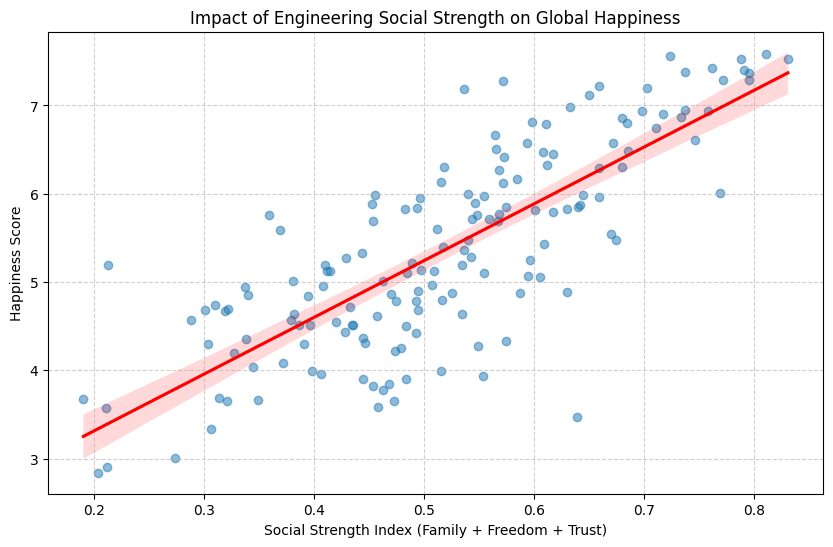

<Figure size 640x480 with 0 Axes>

In [33]:
# Aggregating Social Factors into one index
df['social_strength_index'] = df[['family', 'freedom', 'trust']].mean(axis=1)

# Creating Efficiency Metric (Happiness per unit of GDP)
df['happiness_efficiency'] = np.where(df['gdp_per_capita']>0, df['happiness_score']/df['gdp_per_capita'],0)

# Creating categorical rank using the 75th percentile
top_75 = np.percentile(df['happiness_score'], 75)
df['performance_tier'] = np.where(df['happiness_score']>= top_75, 'Elite', 'Standard' )


# Visualization
plt.figure(figsize=(10,6))
sns.regplot(data = df, x = 'social_strength_index', y = 'happiness_score', scatter_kws = {'alpha':0.5}, line_kws = {'color': 'red'})

plt.title('Impact of Engineering Social Strength on Global Happiness')
plt.xlabel('Social Strength Index (Family + Freedom + Trust)')
plt.ylabel('Happiness Score')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()
plt.savefig('social_strength_plot.png')

## Impact Plot Interpretation

1. Linear relationship - The tight clustering of data points around the red regression line confirms a strong linear relationship. As the engineered Social Strength increases, the Happiness Score rises consistently.

2. The Elite Outliers - The dots in the top-right corner (Social Index > 0.7, Happiness > 7.0). These represent counries that have successfully balanced high personal freedom with strong social safety nets.

3. Resilient Nations - Dots that sit above the red line in the middle of the graph (e.g Social Index around 0.4 but Happiness > 5.0). These are countries that are happier than the math suggests, likely due to cultural factors or unmeasurd variables.

Analysis

In [31]:
x = df[['gdp_per_capita', 'social_strength_index']]
y = df['happiness_score']

model = LinearRegression()
model.fit(x,y)

print(f"Model Intercept: {model.intercept_:.2f}")
print(f"GDP Coefficients: {model.coef_[0]:.2f}")
print(f"Social Strength Coefficients: {model.coef_[1]:.2f}")

Model Intercept: 2.16
GDP Coefficients: 1.32
Social Strength Coefficients: 4.03


##1. The Intercept (2.16)
It suggests that if a country had a zero score in GDP and a zero score in Social Strength, it predicts happiness would be 2.16.

##2. The Weight of Money: GDP (1.32)


*   For every 1-Unit increase in a country's GDP score, their Happiness Score is predicted to increase by 1.32 points.
*    This confirms that wealth is a significant and positive driver of well-being, but it is actually the secondary factore in this model.

##3. Power of the People: Social Strength (4.03)

* For every 1-unit increase in your engineered Social Strength Index, the Happiness Score is predicted to jump by a massive 4.03 points.
* The coefficient for Social Strength is more than 3 times larger than the coefficient for GDP.

